# Causal Representations

## Introduction
**Directed acyclic graphs (DAGs)** are powerful tools used to visually represent and reason about causal relationships between variables. They play a central role in fields such as statistics, machine learning, and causal inference, providing a structured way to model complex dependencies and helping us understand causal mechanisms {cite}`pearl2000causality`, {cite}`koller2009probabilistic`.


The **key elements** of a DAG are:
1. **Nodes**: these represent the variables or events in the system being modeled. Each node corresponds to a specific quantity or concept of interest.
2. **Edges**: directed arrows between nodes that signify causal relationships. An edge from node $X$ to node $Y$ indicates that $X$ has a causal influence on $Y$.
3. **Parent node**: a node that has one or more outgoing edges pointing to other nodes (its children).
4. **Child node**: a node that receives one or more incoming edges from other nodes (its parents).


The **key properties** of a DAG are:
1. **Directed**: each edge in the graph has a specific direction, pointing from one node to another, which reflects the direction of causality.
2. **Acyclic**: DAGs do not contain any cycles. This means that it is impossible to start at one node, follow a series of directed edges, and return to the original node.
3. **Topological ordering**: the nodes of a DAG can be ordered in such a way that for every directed edge $X \rightarrow Y$, node $X$ appears before node $Y$ in the ordering. This allows us to understand the sequence of causal relationships.

> A DAG is a directed graph with no cycles, meaning there is no way to start at one node and trace a path that leads back to the same node. In such a graph, every parent node is a direct cause of its child nodes.


## An Example
To better understand DAGs, let's consider a simple example with the following variables:
1. Temperature (°C)
2. Electricity load (MW)
3. Renewable energy production (MW)
4. Electricity price (GBP)

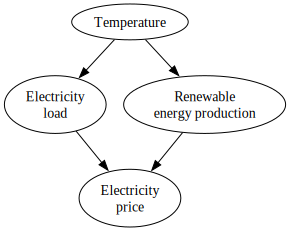

In [2]:
import graphviz
from IPython.display import display

# Create a new graph
dot = graphviz.Digraph()

# Add nodes
dot.node('T', 'Temperature')
dot.node('L', 'Electricity\nload')
dot.node('R', 'Renewable\nenergy production')
dot.node('P', 'Electricity\nprice')

# Add edges
dot.edge('T', 'L')
dot.edge('T', 'R')
dot.edge('R', 'P')
dot.edge('L', 'P')

# Display the graph in the notebook
display(dot)

By examining the DAG, we can understand how changes in one variable may impact others, forming a network of dependencies that govern market dynamics. In the example above, we have:

1. **Temperature → electricity load**: as temperature increases or decreases, it directly affects the electricity load. With warmer temperatures, the demand for electricity increases due to air conditioning usage. Similarly, colder temperatures can increase electricity demand for heating purposes.

2. **Temperature → renewable energy production**: temperature can affect the efficiency and output of renewable energy sources. For example, solar panels may produce more energy on sunny, warm days but less on extremely hot days when efficiency drops. Wind patterns, affected by temperature changes, can also impact wind energy production.

3. **Renewable energy production → electricity price**: the amount of renewable energy produced affects electricity prices. When renewable energy production is high, it can lead to lower electricity prices due to the abundance of cheaper energy sources. Conversely, low renewable energy production can increase reliance on more expensive, non-renewable energy sources, driving up prices.

4. **Electricity load → electricity price**: the demand for electricity (load) influences electricity prices. High electricity demand usually leads to higher prices because the supply must meet the increased load, often requiring more expensive or less efficient energy sources. Lower demand can result in lower prices due to decreased strain on the electricity grid and reliance on cheaper energy sources.

## Key Concepts

To effectively use DAGs for causal inference, it is essential to understand several fundamental concepts. These concepts provide the theoretical foundation for identifying and interpreting causal relationships, ensuring that the DAGs accurately represent the dependencies and independencies within the data {cite}`lauritzen1996graphical`.


### d-separation

In addition to understanding direct causal relationships, it is also important to understand how to determine if variables are conditionally independent given other variables. This concept is known as **d-separation**, and it represents a criterion for deciding whether a set of nodes is independent of another set of nodes given a third set. It is a crucial concept in understanding the flow of information and causation in DAGs.

For example, in the context of our electricity market DAG:
- **Temperature** is d-separated from **electricity price** given **electricity load**. This means that if we know the electricity load, knowing the temperature provides no additional information about the electricity price.
- **Renewable energy production** and **electricity load** are not d-separated, indicating a direct causal relationship without any conditional independence given other variables.

By understanding d-separation, we can better interpret the dependencies and independencies in our DAG, leading to more accurate causal inferences.


### Local Markov Assumption

The local Markov assumption states that a node in a DAG is conditionally independent of its non-descendants given its parents. This assumption allows for the decomposition of the joint probability distribution of all variables in the DAG into simpler conditional distributions. For example, in our DAG, **electricity price** is conditionally independent of **temperature** given **renewable energy production** and **electricity load**. This implies that once we know the values of **renewable energy production** and **electricity load**, additional information about **temperature** does not change our understanding of **electricity price**.


### Factorisation

Factorisation refers to the decomposition of a joint probability distribution into a product of conditional distributions. This is possible under the local Markov assumption. The joint distribution $P(T, L, R, P)$ can be factorised as:

\begin{equation}
    P(T, L, R, P) = P(T) \cdot P(L|T) \cdot P(R|T) \cdot P(P|R, L)
\end{equation}

This factosization simplifies the computation of the joint probability distribution by breaking it down into manageable parts. It allows us to understand the contribution of each variable to the overall distribution, aiding in both analysis and inference.

### Minimality Assumption

The minimality assumption asserts that the DAG representing the causal structure is minimal, meaning that removing any edge would violate the Markov condition for the observed data. It ensures that the model encodes only necessary dependency relationships. It means that the DAG includes only those edges that represent necessary causal relationships. Removing any edge would lead to a loss of information about the dependencies among variables, ensuring that the DAG is the simplest model that adequately represents the data.

### Markov Equivalence Class

A Markov equivalence class contains all DAGs that encode the same conditional independencies. This means that within a Markov equivalence class, multiple DAGs can represent the same set of conditional independence relationships among variables. These DAGs are considered equivalent because they imply the same probabilistic dependencies, even if their structures differ {cite}`chickering2002optimal`.

#### An Example
Consider the following three DAGs involving three variables $X$, $Y$, and $Z$:

**Graph 1:**

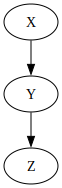

In [3]:
dot = graphviz.Digraph()
dot.node('X')
dot.node('Y')
dot.node('Z')
dot.edge('X', 'Y')
dot.edge('Y', 'Z')
display(dot)

**Graph 2:**

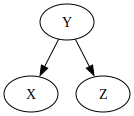

In [4]:
dot = graphviz.Digraph()
dot.node('X')
dot.node('Y')
dot.node('Z')
dot.edge('Y', 'X')
dot.edge('Y', 'Z')
display(dot)

**Graph 3:**

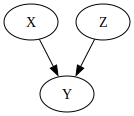

In [5]:
dot = graphviz.Digraph()
dot.node('X')
dot.node('Y')
dot.node('Z')
dot.edge('X', 'Y')
dot.edge('Z', 'Y')
display(dot)

Each of these DAGs represents the same conditional independence relationships: $X \perp Z | Y$, indicating that once we know $Y$, $X$ and $Z$ are independent.

A **completed partially directed acyclic graph (CPDAG)**, also known as an Essential Graph (EG), is a graphical representation that captures all DAGs within a Markov equivalence class. The CPDAG contains both directed and undirected edges:

- **Directed edges** represent causal relationships that are common to all DAGs in the equivalence class.
- **Undirected edges** represent relationships where the directionality is ambiguous among the DAGs in the equivalence class.

The CPDAG can be constructed by:

1. Identifying all DAGs that belong to the same Markov equivalence class.
2. Retaining directed edges that are common to all these DAGs.
3. Converting edges with uncertain directionality into undirected edges.


For the three DAGs shown above, the **CPDAG** would be given by:

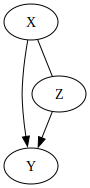

In [6]:
dot = graphviz.Digraph()
dot.node('X')
dot.node('Y')
dot.node('Z')
dot.edge('X', 'Y')
dot.edge('Z', 'Y')
dot.edge('X', 'Z', dir='none')  # undirected edge
display(dot)

In this CPDAG:
- The edges $X \to Y$ and $Z \to Y$ are directed because all DAGs in the equivalence class have these directions.
- The edge $X - Z$ is undirected, indicating that the direction between $X$ and $Z$ is ambiguous within the equivalence class.